### 📌 Выбросы в данных

В этом блоке проводится анализ выбросов с использованием метода межквартильного размаха (IQR).
* По переменной `Mean` (средний коэффициент давления) выбросов почти нет.
* По переменной `StdDev` (стандартное отклонение давления) выбросы есть, но они **не будут удаляться окончательно**, 
  поскольку могут быть обусловлены реальными турбулентными эффектами, важными для дальнейшего анализа.


📈 Доля выбросов:
▪️ Mean: 0 выбросов (0.00%)
▪️ StdDev: 6738 выбросов (4.40%)
✅ После удаления выбросов осталось строк: 146478
📁 Очищенный файл сохранён в:
/mnt/d/projects/wind_pressure_prediction_2025/data/processed/WindLoading_Interference_cleaned_NOT_USED.csv


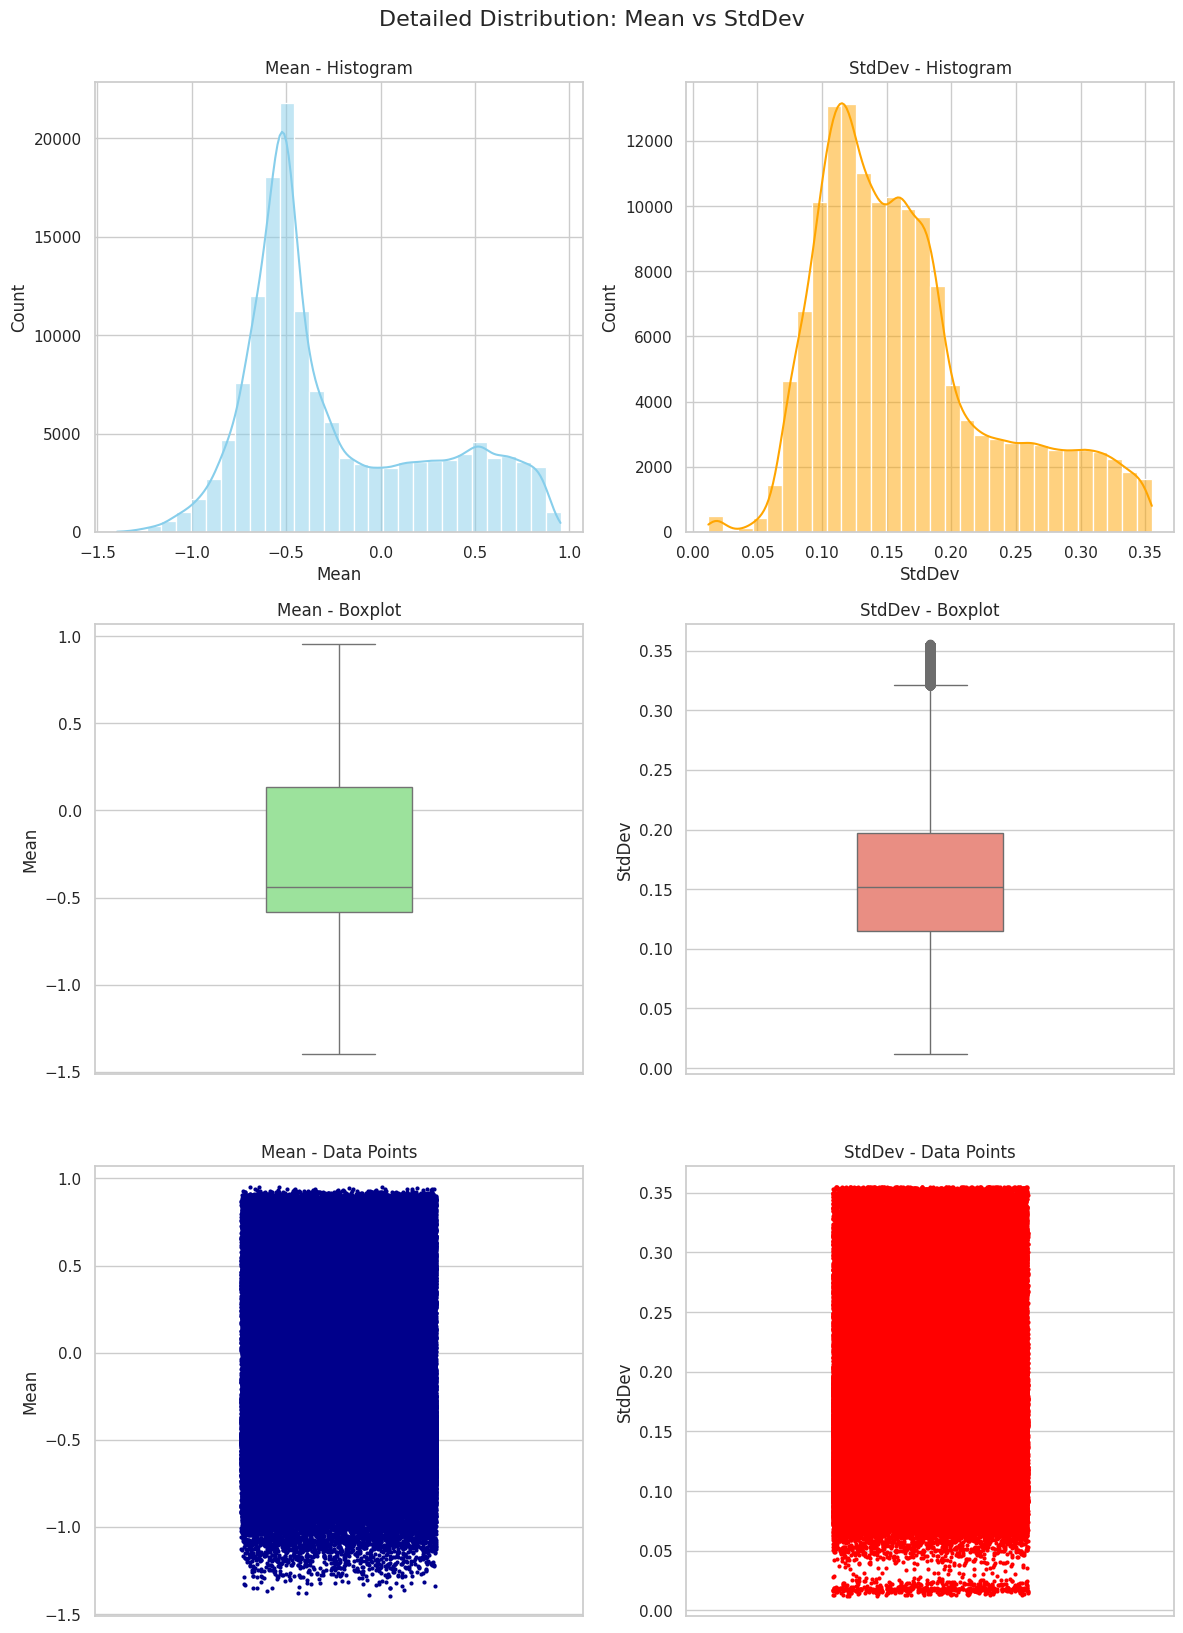

In [7]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Load data
df = pd.read_csv("/mnt/d/projects/wind_pressure_prediction_2025/data/processed/WindLoading_Interference_01.csv")

# Оставляем только строки с Lwr = 1
df = df[df['Lwr'] == 1]

# 🔢 Размер исходного датасета
total_rows = df.shape[0]

# --- Outlier Detection using IQR Method ---
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR  # Можно заменить на 2.5 * IQR, если хочешь
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Проверка для 'Mean' и 'StdDev'
outliers_mean = detect_outliers_iqr(df, 'Mean')
outliers_std = detect_outliers_iqr(df, 'StdDev')
# 📊 Процент выбросов
mean_outliers_pct = len(outliers_mean) / total_rows * 100
std_outliers_pct = len(outliers_std) / total_rows * 100

print(f"📈 Доля выбросов:")
print(f"▪️ Mean: {len(outliers_mean)} выбросов ({mean_outliers_pct:.2f}%)")
print(f"▪️ StdDev: {len(outliers_std)} выбросов ({std_outliers_pct:.2f}%)")

# Удалим выбросы по обоим колонкам
df_cleaned = df.copy()

# Удаляем строки с выбросами по индексу
combined_outliers = pd.concat([outliers_mean, outliers_std]).drop_duplicates()
df_cleaned = df_cleaned.drop(index=combined_outliers.index)

print(f"✅ После удаления выбросов осталось строк: {df_cleaned.shape[0]}")

# Сохраняем в CSV
output_path = "/mnt/d/projects/wind_pressure_prediction_2025/data/processed/WindLoading_Interference_cleaned_NOT_USED.csv"

df_cleaned.to_csv(output_path, index=False)
print(f"📁 Очищенный файл сохранён в:\n{output_path}")

# 🧠 Расширенная визуализация переменных Mean и StdDev
fig, axes = plt.subplots(3, 2, figsize=(12, 16))

# 👉 Mean
sns.histplot(df_cleaned['Mean'], bins=30, ax=axes[0, 0], kde=True, color="skyblue")
axes[0, 0].set_title("Mean - Histogram")

sns.boxplot(y=df_cleaned['Mean'], ax=axes[1, 0], color="lightgreen", width=0.3)
axes[1, 0].set_title("Mean - Boxplot")

sns.stripplot(y=df_cleaned['Mean'], ax=axes[2, 0], color="darkblue", size=3, jitter=0.2)
axes[2, 0].set_title("Mean - Data Points")

# 👉 StdDev
sns.histplot(df_cleaned['StdDev'], bins=30, ax=axes[0, 1], kde=True, color="orange")
axes[0, 1].set_title("StdDev - Histogram")

sns.boxplot(y=df_cleaned['StdDev'], ax=axes[1, 1], color="salmon", width=0.3)
axes[1, 1].set_title("StdDev - Boxplot")

sns.stripplot(y=df_cleaned['StdDev'], ax=axes[2, 1], color="red", size=3, jitter=0.2)
axes[2, 1].set_title("StdDev - Data Points")

plt.tight_layout()
plt.suptitle("Detailed Distribution: Mean vs StdDev", fontsize=16, y=1.02)
plt.show()
